<a href="https://colab.research.google.com/github/Abishethvarman/ChatGPT-Education/blob/main/refined_topic_modelling_chatgpt_education_LDA%2Bvisualizer%2Bcombined_data%2B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install wordcloud pyLDAvis

In [2]:
import pandas as pd
import nltk
import torch
import numpy as np
import matplotlib.pyplot as plt
import string
import pyLDAvis
import pyLDAvis.lda_model
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping c

True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

In [4]:
data = pd.read_csv("ChatGPT_Tweets_Dataset_Full.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
row_count = data.shape[0]
print("Total Tweets:", row_count)

Total Tweets: 3821843


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data = data.drop_duplicates(subset='original_text')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
subset_data = data.iloc[:2000000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
subset_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,tweet_id,original_text,sentiment,tasks,users,technologies,organizations,job_competencies,job_profiles,nouns,verbs,adjectives,subjects,objects,predicates,topic
0,0,1597847994526842880,[GPT-3] This post discusses the need for an au...,neutral,ensure safety,NaN,artificial intelligence,"GPT3, Artificial Intelligence AI, AI",logic,NaN,"gpt3, post, need, audit, system, intelligence,...","discusses, ensure, suggests, focus, creating",artificial,"this post, it, the development of ai",the need for an audit system for artificial in...,discusses,"gpt4, ai, gpt3, deeplearning gpt, ai gpt, will..."
1,1,1597847639823118336,@soniajoseph_ Gpt = black box = fancy statitis...,neutral,NaN,NaN,NaN,Gpt,NaN,NaN,"box, fancy, statitistics",NaN,"username, gpt, black",NaN,NaN,statitistics,"gpt, ask gpt, gpt gpt, lol, use gpt, using gpt"
2,2,1597846446765936640,"Today, I'm working on building my own AI writi...",neutral,NaN,NaN,api,"AI, GPT3 Heres",plan,secretary,"today, ai, w, gpt3, plan, playground, connect,...","im, working, building, writing, heres, explore...","own, assistant, openai, api, cool","i, assistant w gpt3, the plan, this, you","my own, openai playground connect, api ship, a...",working,"chatgpt, ai, will"
3,3,1597845565056126976,"Ars Technica: OpenAI upgrades GPT-3, stunning ...",positive,NaN,NaN,NaN,GPT3,NaN,NaN,"ars, upgrades, poetry, lyrics, username","technica, gpt3, stunning, rhyming",openai,NaN,"rhyming poetry and lyrics, username",stunning,"chatgpt, ai, will"
4,4,1597845515991142400,@RandomSprint @goth600 @jeremymstamper @heyors...,negative,NaN,guy,NaN,GPT3,NaN,NaN,"type, guy, gpt3, stop, nobody, hes","talks, believes","username, cant, real","who, nobody, he","guy, gpt3",type,"chatgpt, ai, will"


In [9]:
row_count = subset_data.shape[0]
print("Total Tweets:", row_count)

Total Tweets: 2000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
row_count_after_cleaning_duplicates = subset_data.shape[0]
print("Total Tweets:", row_count_after_cleaning_duplicates)

Total Tweets: 2000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
 # Preprocessing
def preprocess_text(text):
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = [
    "more", "good", "one", "two", "via", "gpt", "chatgpt","gpt3","text","like",
    "http","https","nft", "job", "ai", "bot", "twitter", "openai", "software", "developer", "robot", "service",
    "cgpt", "gpt4", "new", "chat", "machinelearning", "artificialintelligence"]

    stop_words.update(custom_stopwords)

    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Reconstruct text
    processed_text = ' '.join(tokens)
    return processed_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Apply preprocessing to dataset
subset_data['processed_text'] = subset_data['original_text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-42fcc183f83b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['processed_text'] = subset_data['original_text'].apply(preprocess_text)


In [15]:
# Feature extraction - CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(subset_data['processed_text'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Apply LDA
num_topics = 15
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda_model.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    # top_words = [vectorizer.get_feature_names()[i] for i in top_words_idx]
    print(f"Topic {topic_idx}:")
    print(top_words)


Topic 0:
['intelligence', 'artificial', 'post', 'education', 'amp', 'blog', 'talk', 'school', 'read', 'join']
Topic 1:
['writing', 'student', 'use', 'code', 'using', 'tool', 'essay', 'exam', 'paper', 'could']
Topic 2:
['prompt', 'write', 'chatbot', 'na', 'email', 'image', 'book', 'use', 'gon', 'script']
Topic 3:
['content', 'use', 'tool', 'help', 'business', 'create', 'amp', 'marketing', 'using', 'product']
Topic 4:
['google', 'search', 'bing', 'microsoft', 'bard', 'engine', 'chatbot', 'extension', 'internet', 'web']
Topic 5:
['microsoft', 'technology', 'thread', 'tech', 'company', 'summary', 'billion', 'week', 'innovation', 'news']
Topic 6:
['asked', 'write', 'got', 'story', 'love', 'said', 'wrote', 'day', 'poem', 'friend']
Topic 7:
['make', 'using', 'video', 'youtube', 'money', 'use', 'api', 'free', 'people', 'would']
Topic 8:
['crypto', 'project', 'blockchain', 'million', 'user', 'metaverse', 'airdrop', 'token', 'check', 'fast']
Topic 9:
['answer', 'question', 'ask', 'problem', 'rig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


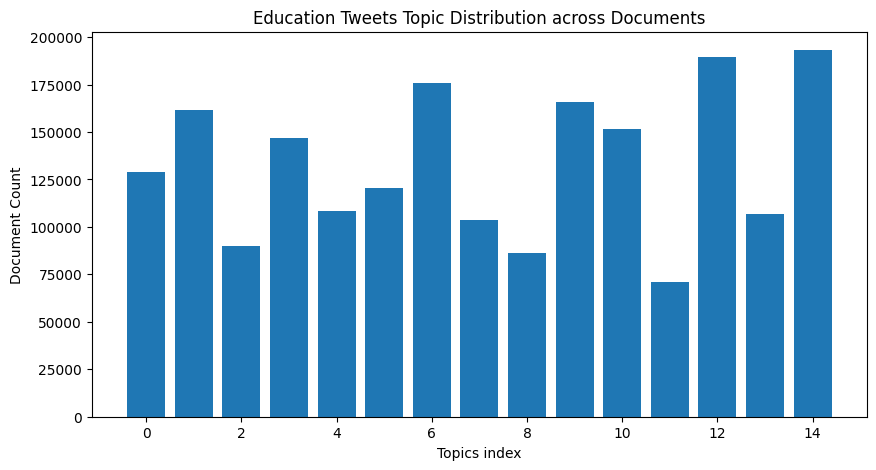

In [19]:
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution)

plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_counts)), topic_counts)
plt.xlabel('Topics index')
plt.ylabel('Document Count')
plt.title('Education Tweets Topic Distribution across Documents')
plt.show()

In [20]:
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
import plotly.express as px

num_words = 10

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Education in ChatGPT Key Words")
    fig.update_layout(xaxis_title="Word Importance", yaxis_title="Words")
    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-1af34ed1c912>:8: RuntimeWarning: overflow encountered in exp
  word_importance = np.exp(topic[top_words_idx])


<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-1af34ed1c912>:8: RuntimeWarning:

overflow encountered in exp



In [ ]:
num_words = 10  # Number of most used words to display

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Most Used Words in Fake News")

    # Add color and hover data
    fig.update_traces(marker_color='blue', hovertemplate='%{x:.2f}', hoverinfo='x+y')

    # Add annotations for the highest word importance
    max_importance = max(word_importance)
    max_idx = word_importance.argmax()
    fig.add_annotation(x=max_importance, y=top_words[max_idx], text=f'Max Importance: {max_importance:.2f}', showarrow=True)

    # Customize layout
    fig.update_layout(
        xaxis_title="Word Importance",
        yaxis_title="Words",
        font=dict(family="Arial", size=12),
        title_font=dict(size=16),
        plot_bgcolor='white'
    )

    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-21-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



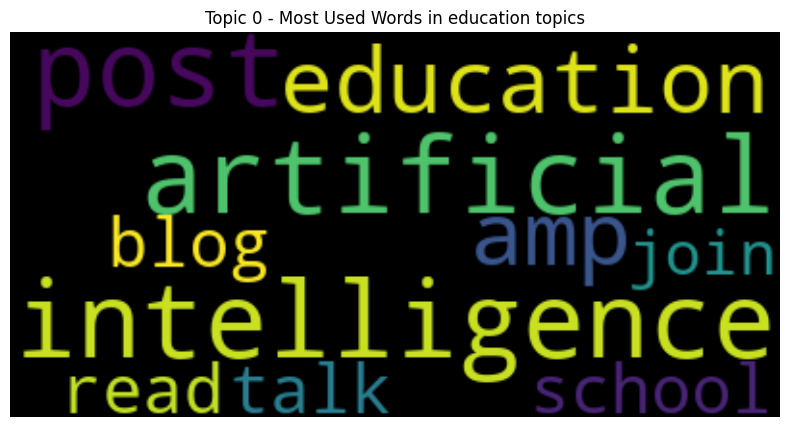

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



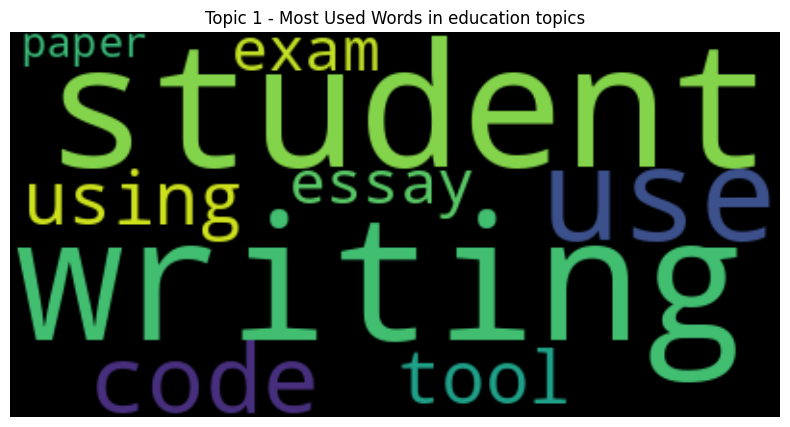

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



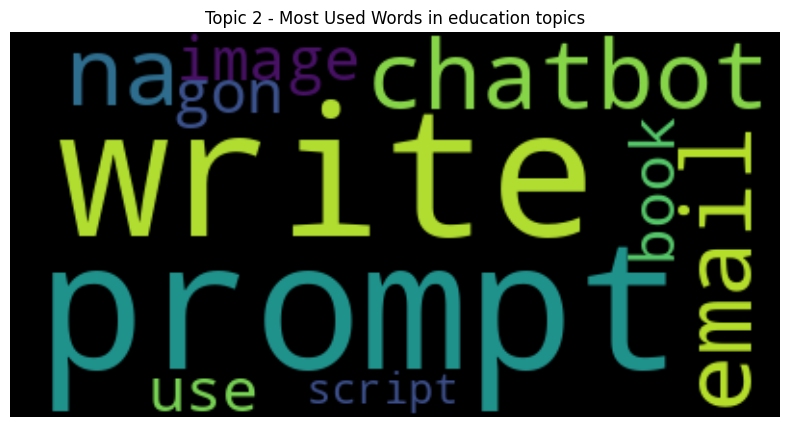

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



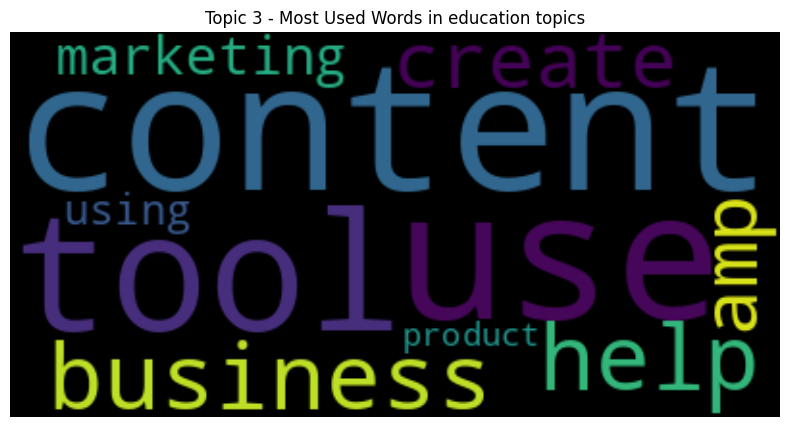

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



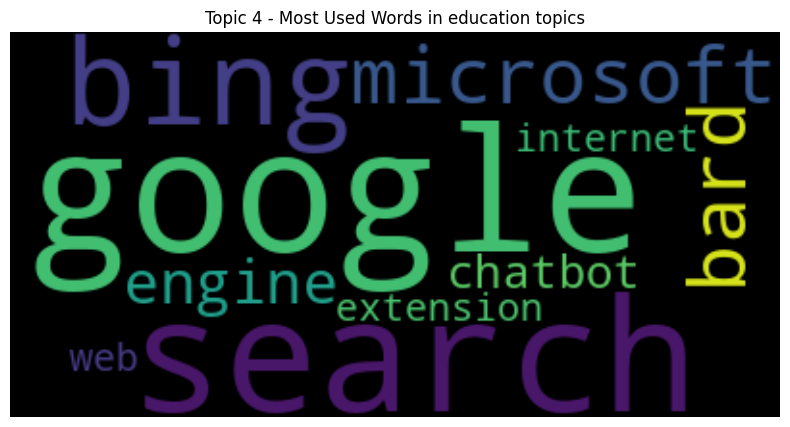

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



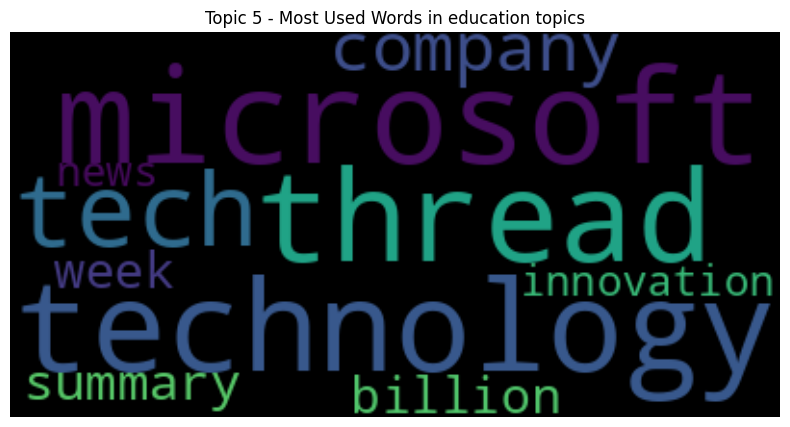

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



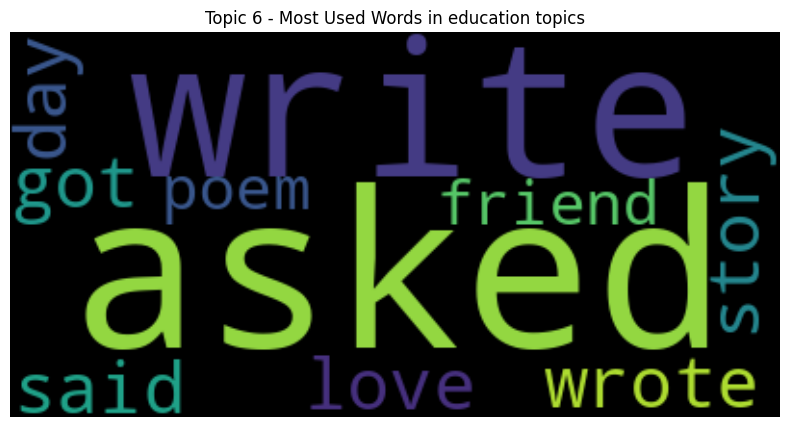

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



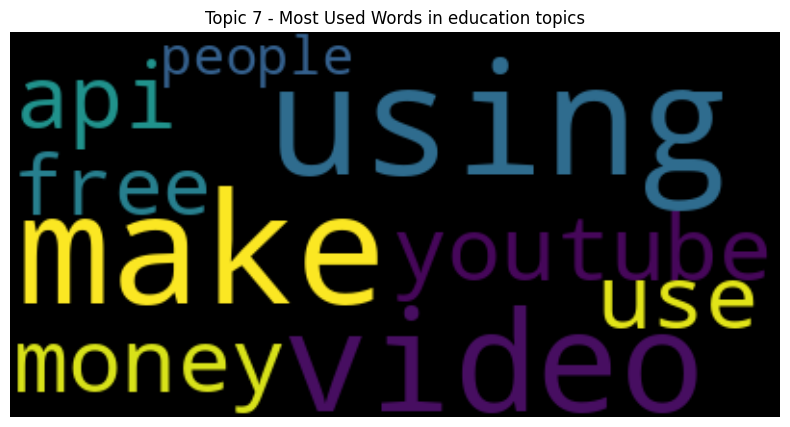

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



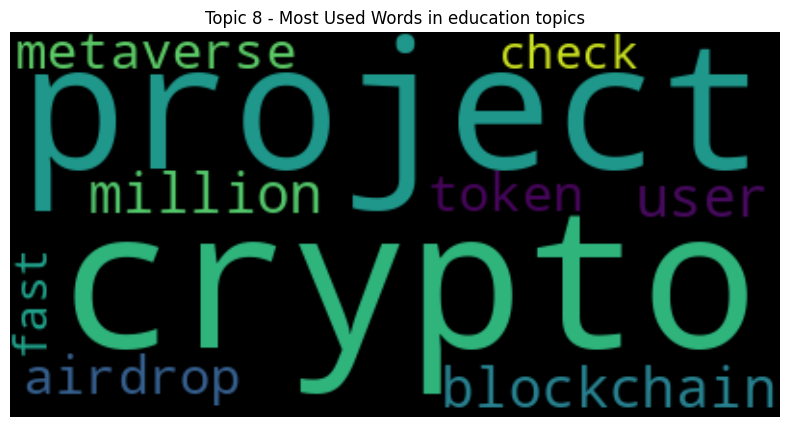

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



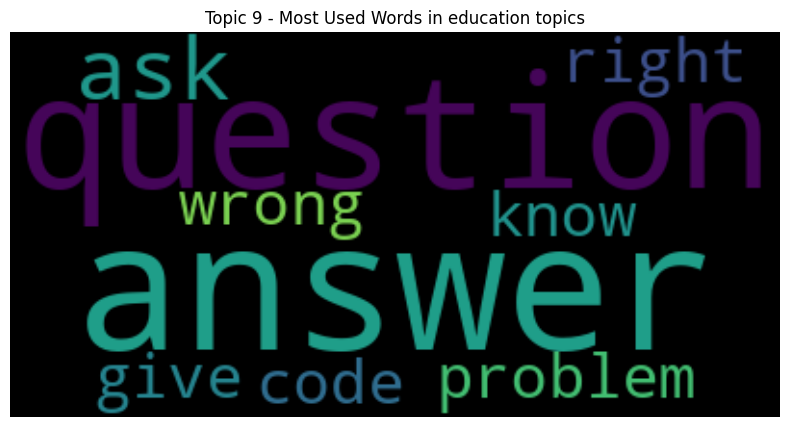

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



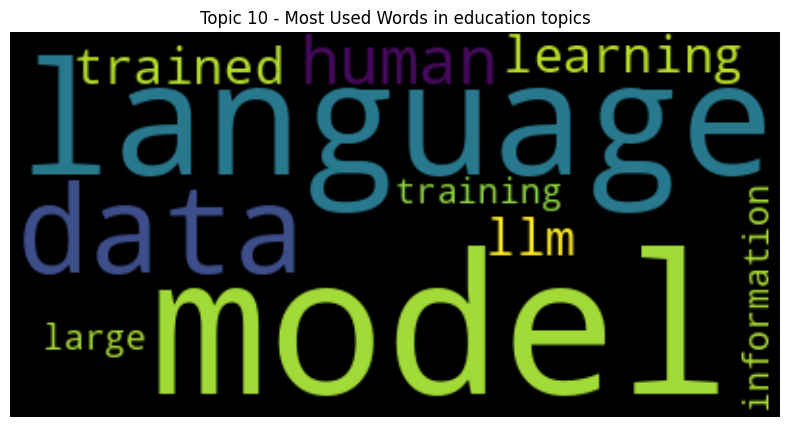

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



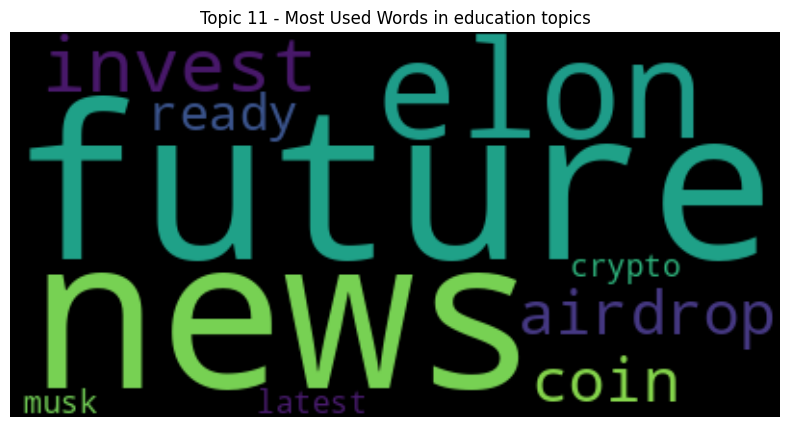

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



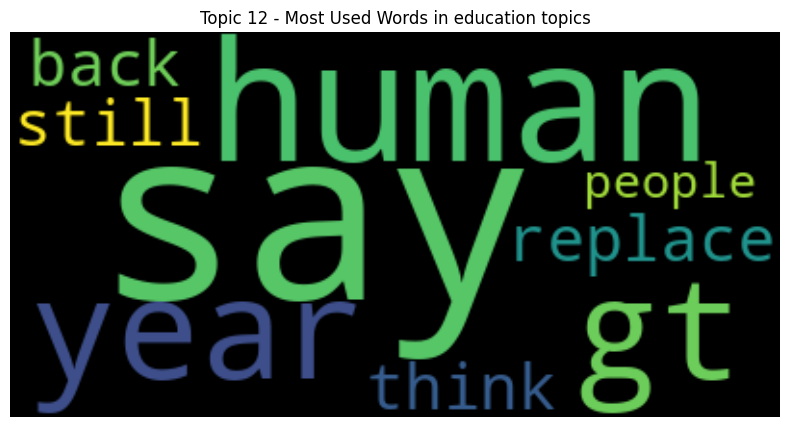

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



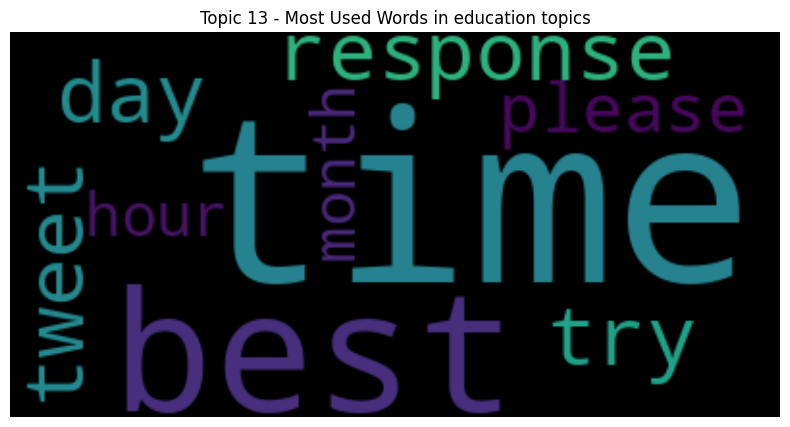

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



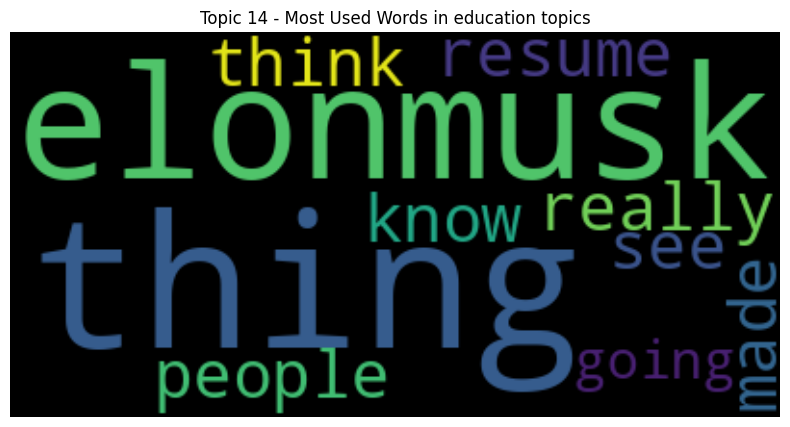

In [22]:
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words = ' '.join(top_words)

    wordcloud = WordCloud(width=400, height=200, background_color='black').generate(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx} - Most Used Words in education topics")
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(-1.0999999946735637,
 1.099999988177974,
 -1.0999999943145464,
 1.0999999971299437)

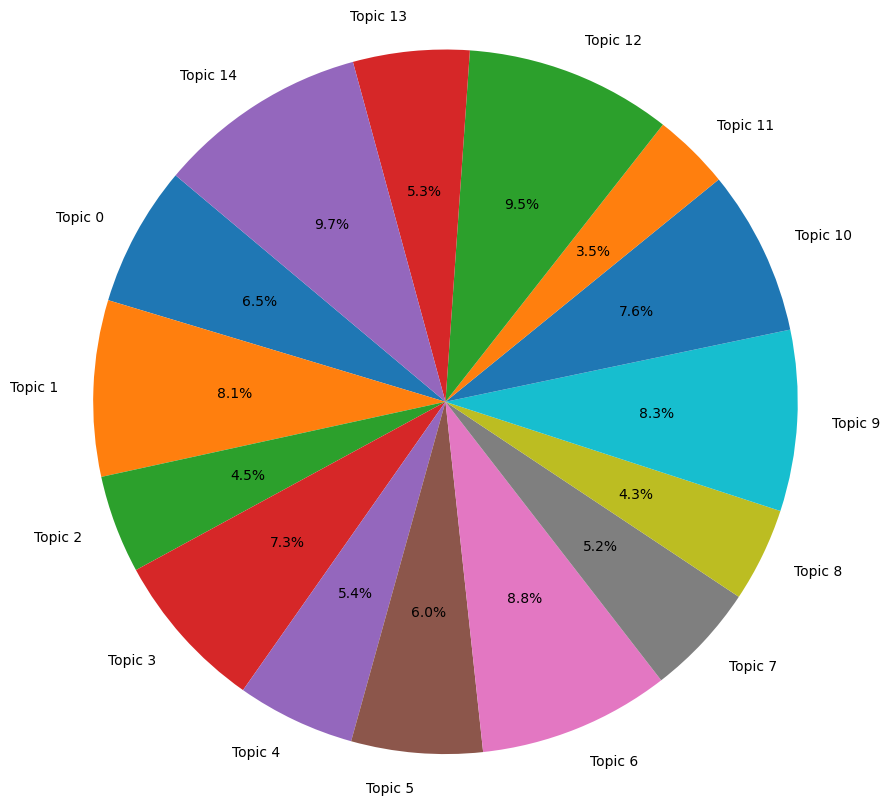

In [23]:

total_documents = len(data)
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution, minlength=num_topics)

plt.figure(figsize=(10, 10))
plt.pie(topic_counts, labels=[f"Topic {i}" for i in range(num_topics)], autopct="%1.1f%%", startangle=140)
plt.axis("equal")

In [24]:
processed_text = subset_data['processed_text'].apply(lambda x: x.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [25]:
dictionary = Dictionary(processed_text)
corpus = [dictionary.doc2bow(text) for text in processed_text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda_model, X, vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
output_html_path = "lda_visualization_chatgpt_education.html"
pyLDAvis.save_html(vis, output_html_path)


print(f"Visualization saved as {output_html_path}")

Visualization saved as lda_visualization_chatgpt_education.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_topics = tsne.fit_transform(topic_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_topics[:, 0], tsne_topics[:, 1], c=topic_distribution, cmap='viridis', alpha=0.7)
plt.colorbar(label='Topic')
plt.title('Semantic Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
# Subset of topic_matrix for visualization
num_samples = 35

subset_topic_matrix = topic_matrix[:num_samples]

# Fit t-SNE to subset_topic_matrix
tsne = TSNE(n_components=2, random_state=42)
tsne_topics = tsne.fit_transform(subset_topic_matrix)

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed

# Define a list of colors for each topic
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'grey', 'cyan']

# Scatter plot with labels for each topic
for topic_idx, (x, y) in enumerate(tsne_topics):
    plt.scatter(x, y, color=colors[topic_idx % len(colors)], label=f"Topic {topic_idx}", alpha=0.7)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Semantic Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
